In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
# load the dataset
df = pd.read_csv('../data/crimedataset.csv')
is_df = pd.read_csv('../data/indexes-scores.csv')

In [25]:
# Drop the Month Year column
df = df.drop(columns=["Month Year"])

# Group by the suburb (Division) and sum all crimes
crime_by_division = df.groupby("Division").sum(numeric_only=True).reset_index()

# Preview the result
print(crime_by_division['total'])
is_df.head()

0        21576
1        46893
2        72210
3        97527
4       122844
        ...   
329    8350869
330    8376186
331    8401503
332    8426820
333    8452137
Name: total, Length: 334, dtype: int64


,Localities,IRSD Score,IRSD Decile,IRSDA Score,IRSDA Decile,IER Score,IER Decile,IEO Score,IEO Decile,Usual Resident Population
0,Acacia Ridge,856.160877,1.0,871.816508,1.0,877.098897,1.0,906.705159,2.0,7486.0
1,Adavale,1064.484371,9.0,1051.599709,9.0,1085.093868,9.0,1068.319439,9.0,72.0
2,Agnes Water,968.252739,3.0,929.126462,3.0,969.950116,3.0,918.840556,3.0,2729.0
3,Albany Creek,1086.676675,10.0,1068.768212,9.0,1090.198282,9.0,1047.041146,9.0,16385.0
4,Allora,950.754125,2.0,921.898770,2.0,964.673318,2.0,910.305106,2.0,1205.0


In [26]:
# grouping crimes by violent, property, drug, domestic violence, and other categories to simplify analysis
violent_crime_cols = [
    'Homicide (Murder)', 'Other Homicide', 'Attempted Murder', 'Conspiracy to Murder',
    'Manslaughter (excl. by driving)', 'Manslaughter Unlawful Striking Causing Death',
    'Driving Causing Death', 'Assault', 'Grievous Assault', 'Serious Assault',
    'Serious Assault (Other)', "Common Assault'", 'Sexual Offences', 'Rape and Attempted Rape',
    'Other Sexual Offences', 'Robbery', 'Armed Robbery', 'Unarmed Robbery',
    'Other Offences Against the Person', 'Kidnapping & Abduction etc.', 'Extortion',
    'Life Endangering Acts', 'Voluntary Assisted Dying', 'Offences Against the Person'
]
property_crime_cols = [
    'Unlawful Entry', 'Unlawful Entry With Intent - Dwelling', 'Unlawful Entry Without Violence - Dwelling',
    'Unlawful Entry With Violence - Dwelling', 'Unlawful Entry With Intent - Shop',
    'Unlawful Entry With Intent - Other', 'Arson', 'Other Property Damage',
    'Unlawful Use of Motor Vehicle', 'Other Theft (excl. Unlawful Entry)', 'Stealing from Dwellings',
    'Shop Stealing', 'Vehicles (steal from/enter with intent)', 'Other Stealing',
    'Fraud', 'Fraud by Computer', 'Fraud by Cheque', 'Fraud by Credit Card', 'Identity Fraud',
    'Other Fraud', 'Handling Stolen Goods', 'Possess Property Suspected Stolen', 'Receiving Stolen Property',
    'Possess etc. Tainted Property', 'Other Handling Stolen Goods', 'Offences Against Property'
]
drug_offence_cols = [
    'Drug Offences', 'Trafficking Drugs', 'Possess Drugs', 'Produce Drugs',
    'Sell Supply Drugs', 'Other Drug Offences'
]
dv_related_cols = [
    'Breach Domestic Violence Protection Order'
]
other_crime_cols = [
    'Prostitution Offences', 'Found in Places Used for Purpose of Prostitution Offences',
    'Have Interest in Premises Used for Prostitution Offences', 'Stalking',
    'Knowingly Participate in Provision Prostitution Offences', 'Public Soliciting',
    'Procuring Prostitution', 'Permit Minor to be at a Place Used for Prostitution Offences',
    'Advertising Prostitution', 'Other Prostitution Offences',
    'Liquor (excl. Drunkenness)', 'Gaming Racing & Betting Offences',
    'Trespassing and Vagrancy', 'Weapons Act Offences', 'Unlawful Possess Concealable Firearm',
    'Unlawful Possess Firearm - Other', 'Bomb Possess and/or use of',
    'Possess and/or use other weapons; restricted items', 'Weapons Act Offences - Other',
    'Good Order Offences', 'Disobey Move-on Direction', 'Resist Incite Hinder Obstruct Police',
    'Fare Evasion', 'Public Nuisance', 'Stock Related Offences',
    'Traffic and Related Offences', 'Dangerous Operation of a Vehicle', 'Drink Driving',
    'Disqualified Driving', 'Interfere with Mechanism of Motor Vehicle',
    'Miscellaneous Offences', 'Other Offences'
]

In [27]:
# makeing a copy of the crime_by_division DataFrame to avoid modifying the original
crime_df = crime_by_division.copy()

# Summing the relevant columns to create new columns for each crime category
crime_df["Violent Crime"] = crime_df[violent_crime_cols].sum(axis=1)
crime_df["Property Crime"] = crime_df[property_crime_cols].sum(axis=1)
crime_df["Drug Offences"] = crime_df[drug_offence_cols].sum(axis=1)
crime_df["DV-Related"] = crime_df[dv_related_cols].sum(axis=1)
crime_df["Other Crimes"] = crime_df[other_crime_cols].sum(axis=1)
crime_df.rename(columns={"total": "Total Crimes"}, inplace=True)

crime_df.head()

,Division,Homicide (Murder),Other Homicide,Attempted Murder,Conspiracy to Murder,Manslaughter (excl. by driving),Manslaughter Unlawful Striking Causing Death,Driving Causing Death,Assault,Grievous Assault,...,Drink Driving,Disqualified Driving,Interfere with Mechanism of Motor Vehicle,Miscellaneous Offences,Other Offences,Total Crimes,Violent Crime,Property Crime,DV-Related,Other Crimes
0,Acacia Ridge,2,6,5,0,0,0,1,1259,38,...,806,521,1,113,6277,21576,6257,47700,1448,11477
1,Adavale,0,0,0,0,0,0,0,1,0,...,2,0,0,0,8,46893,21,27,0,17
2,Agnes Water,0,0,0,0,0,0,0,94,7,...,304,83,1,5,1222,72210,552,2199,156,2520
3,Albany Creek,3,3,2,1,0,0,0,693,20,...,685,244,0,104,4100,97527,3423,19106,619,8185
4,Allora,0,1,1,0,0,0,0,57,1,...,122,37,0,14,695,122844,307,927,73,1246


In [28]:
# Grouping the data by crime categories
# and summing the values for each category
grouped_cols = ["Violent Crime", "Property Crime", "Drug Offences", "DV-Related", "Other Crimes"]

grouped_crime_df = crime_df[[
    "Division", "Violent Crime", "Property Crime", "Drug Offences", "DV-Related", "Other Crimes", "Total Crimes"
]]

# for some reason the default total column was not being calculated correctly, so we are calculating it manually
grouped_crime_df.loc[:, "Total Crimes"] = grouped_crime_df[grouped_cols].sum(axis=1)

grouped_crime_df.head()


,Division,Violent Crime,Property Crime,Drug Offences,DV-Related,Other Crimes,Total Crimes
0,Acacia Ridge,6257,47700,4180,1448,11477,71062
1,Adavale,21,27,6,0,17,71
2,Agnes Water,552,2199,762,156,2520,6189
3,Albany Creek,3423,19106,2606,619,8185,33939
4,Allora,307,927,662,73,1246,3215


In [29]:
# merge indexes-scores.csv with the grouped crime DataFrame
merged_df = pd.merge(grouped_crime_df, is_df, how='right', left_on='Division', right_on='Localities')
merged_df.drop(columns='Localities', inplace=True)
# Preview the merged DataFrame
print(merged_df.head())

       Division  Violent Crime  Property Crime  Drug Offences  DV-Related  \
0  Acacia Ridge         6257.0         47700.0         4180.0      1448.0   
1       Adavale           21.0            27.0            6.0         0.0   
2   Agnes Water          552.0          2199.0          762.0       156.0   
3  Albany Creek         3423.0         19106.0         2606.0       619.0   
4        Allora          307.0           927.0          662.0        73.0   

   Other Crimes  Total Crimes   IRSD Score  IRSD Decile  IRSDA Score  \
0       11477.0       71062.0   856.160877          1.0   871.816508   
1          17.0          71.0  1064.484371          9.0  1051.599709   
2        2520.0        6189.0   968.252739          3.0   929.126462   
3        8185.0       33939.0  1086.676675         10.0  1068.768212   
4        1246.0        3215.0   950.754125          2.0   921.898770   

   IRSDA Decile    IER Score  IER Decile    IEO Score  IEO Decile  \
0           1.0   877.098897       

In [30]:
crime_columns = ["Violent Crime", "Property Crime", "Drug Offences", "DV-Related", "Other Crimes", "Total Crimes"]

# Calculate the crime rate per 100,000 people for each crime category
# and replace the original values in the DataFrame
# to normalize the data and make it easier to compare across different regions
for col in crime_columns:
    merged_df[col] = (merged_df[col] / merged_df["Usual Resident Population"]) * 100000
    
merged_df.head()


,Division,Violent Crime,Property Crime,Drug Offences,DV-Related,Other Crimes,Total Crimes,IRSD Score,IRSD Decile,IRSDA Score,IRSDA Decile,IER Score,IER Decile,IEO Score,IEO Decile,Usual Resident Population
0,Acacia Ridge,83582.687684,637189.420251,55837.563452,19342.773177,153312.850655,949265.295218,856.160877,1.0,871.816508,1.0,877.098897,1.0,906.705159,2.0,7486.0
1,Adavale,29166.666667,37500.000000,8333.333333,0.000000,23611.111111,98611.111111,1064.484371,9.0,1051.599709,9.0,1085.093868,9.0,1068.319439,9.0,72.0
2,Agnes Water,20227.189447,80578.966654,27922.315867,5716.379626,92341.517039,226786.368633,968.252739,3.0,929.126462,3.0,969.950116,3.0,918.840556,3.0,2729.0
3,Albany Creek,20891.058895,116606.652426,15904.790967,3777.845590,49954.226427,207134.574306,1086.676675,10.0,1068.768212,9.0,1090.198282,9.0,1047.041146,9.0,16385.0
4,Allora,25477.178423,76929.460581,54937.759336,6058.091286,103402.489627,266804.979253,950.754125,2.0,921.898770,2.0,964.673318,2.0,910.305106,2.0,1205.0


In [31]:
# describing the population column to remove low values
merged_df['Usual Resident Population'].describe()

count      315.000000
mean      4438.771429
std       6089.264853
min         19.000000
25%        482.000000
50%       1576.000000
75%       6561.500000
max      37951.000000
Name: Usual Resident Population, dtype: float64

In [39]:
# after looking at the population column, decided to remove values below the 25th percentile
# to remove outliers and focus on more populated areas for more meaningful analysis
population_threshold = 250

# Number of divisions below threshold
below_threshold = merged_df[merged_df["Usual Resident Population"] < population_threshold]
print(f"Divisions below {population_threshold}: {len(below_threshold)}")

# Number of divisions above threshold
above_threshold = merged_df[merged_df["Usual Resident Population"] >= population_threshold]
print(f"Divisions above {population_threshold}: {len(above_threshold)}")

# Percentage of total
total = len(merged_df)
print(f"Percentage retained: {len(above_threshold) / total:.2%}")

print("Original dataset stats:")
print(merged_df["Usual Resident Population"].sum())

print("\nFiltered dataset stats (above threshold):")
print(above_threshold["Usual Resident Population"].sum())

# Count how many divisions are in each decile for each index
irsd_counts = merged_df['IRSD Decile'].value_counts().sort_index()
ier_counts = merged_df['IER Decile'].value_counts().sort_index()
ieo_counts = merged_df['IEO Decile'].value_counts().sort_index()

# Combine into a single DataFrame
decile_counts = pd.DataFrame({
    'IRSD Count': irsd_counts,
    'IER Count': ier_counts,
    'IEO Count': ieo_counts
}).fillna(0).astype(int)
decile_counts

check = merged_df.groupby(['IRSD Decile'])['Usual Resident Population'].sum().reset_index()
check

Divisions below 250: 41
Divisions above 250: 274
Percentage retained: 86.71%
Original dataset stats:
1398213.0

Filtered dataset stats (above threshold):
1391713.0


,IRSD Decile,Usual Resident Population
0,1.0,289924.0
1,2.0,172723.0
2,3.0,172164.0
3,3.5,11202.0
4,4.0,110950.0
5,5.0,192579.0
6,6.0,113375.0
7,7.0,172999.0
8,8.0,40536.0
9,9.0,80469.0


In [13]:
# removing the divisions below the threshold
# and resetting the index for clarity
filtered_merged_df = merged_df[merged_df["Usual Resident Population"] >= population_threshold].copy()
filtered_merged_df.reset_index(drop=True, inplace=True)
# Preview the filtered DataFrame
print(filtered_merged_df.head())

       Division  Violent Crime  Property Crime  Drug Offences    DV-Related  \
0  Acacia Ridge   83582.687684   637189.420251   55837.563452  19342.773177   
1   Agnes Water   20227.189447    80578.966654   27922.315867   5716.379626   
2  Albany Creek   20891.058895   116606.652426   15904.790967   3777.845590   
3        Allora   25477.178423    76929.460581   54937.759336   6058.091286   
4         Alpha   10733.452594    45438.282648   15384.615385   3935.599284   

    Other Crimes   Total Crimes   IRSD Score  IRSD Decile  IRSDA Score  \
0  153312.850655  949265.295218   856.160877          1.0   871.816508   
1   92341.517039  226786.368633   968.252739          3.0   929.126462   
2   49954.226427  207134.574306  1086.676675         10.0  1068.768212   
3  103402.489627  266804.979253   950.754125          2.0   921.898770   
4   60644.007156  136135.957066  1013.441709          5.0   978.378824   

   IRSDA Decile    IER Score  IER Decile    IEO Score  IEO Decile  \
0          

In [14]:
# describe grouped crime data to get a summary of the data
# and check for outliers / divisions with low crime rates
filtered_merged_df["Total Crimes"].describe()

count    2.350000e+02
mean     7.311467e+05
std      9.095771e+05
min      7.185792e+04
25%      2.685302e+05
50%      4.201253e+05
75%      8.043633e+05
max      6.534036e+06
Name: Total Crimes, dtype: float64

In [15]:
# scaling by log1p the Total Crimes column for better visualization
log_grouped_crime_df = np.log1p(filtered_merged_df["Total Crimes"])

log_grouped_crime_df.describe()

count    235.000000
mean      13.080767
std        0.855191
min       11.182460
25%       12.500714
50%       12.948311
75%       13.597718
max       15.692535
Name: Total Crimes, dtype: float64

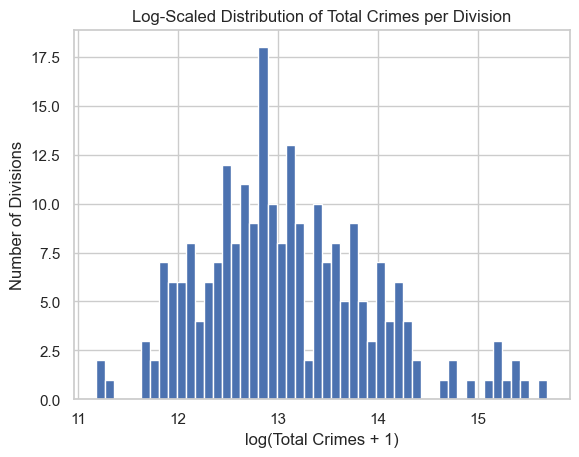

In [18]:
#set Seaborn theme for cleaner visuals
sns.set_theme(style="whitegrid")

# Plotting the distribution of total crimes per division
# using log1p to scale the data for better visualization
plt.hist(log_grouped_crime_df, bins=50)
plt.title("Log-Scaled Distribution of Total Crimes per Division")
plt.xlabel("log(Total Crimes + 1)")
plt.ylabel("Number of Divisions")
plt.savefig('../plots/total_crimes_log_scaled_distribution.png', dpi=300, bbox_inches='tight')


In [19]:
# the data looks normally distributed, so we can use a normal distribution to fit the data

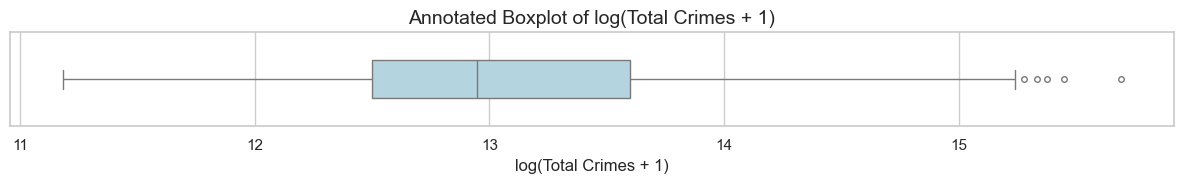

In [20]:
# Set up boxplot to visualize the distribution of log(Total Crimes + 1)
plt.figure(figsize=(12, 2))
sns.boxplot(
    x=log_grouped_crime_df, 
    color="lightblue",
    width=0.4,
    fliersize=4,
    linewidth=1
)

# Final touches
plt.title("Annotated Boxplot of log(Total Crimes + 1)", fontsize=14)
plt.xlabel("log(Total Crimes + 1)")
plt.tight_layout()
plt.savefig('../plots/total_crimes_log_scaled_boxplot.png', dpi=300, bbox_inches='tight')

In [21]:
# Looking at the boxplot, we can see that there are some outliers above the 75th percentile
# however, adjusting the series to log1p has helped to reduce the impact of these outliers
# data seems ok after looking at the histogram and boxplot


In [22]:
# save the filtered DataFrame to a new CSV file
filtered_merged_df.to_csv("../data/division_offences_by_seifa_indexes.csv", index=False)